<a href="https://colab.research.google.com/github/aiyingliulang/Play-with-Machine-Learning-Algorithms/blob/master/%E7%AC%AC4%E8%AF%BE_%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
df_heart = pd.read_csv('heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df_heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

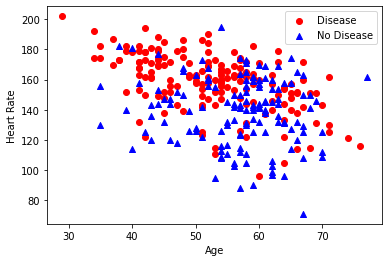

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x=df_heart.age[df_heart.target==1],
            y=df_heart.thalach[df_heart.target==1],c='r')
plt.scatter(x=df_heart.age[df_heart.target==0],
             y=df_heart.thalach[df_heart.target==0],c='b',marker='^')
plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

In [30]:
X = df_heart.drop(['target'],axis=1)
y = df_heart.target.values
y = y.reshape(-1,1)
print('张量X的形状：', X.shape)
print('张量y的形状：', y.shape)

张量X的形状： (303, 13)
张量y的形状： (303, 1)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

In [34]:
def loss_function(X, y, w, b):
    y_hat = sigmoid(np.dot(X, w) + b)
    loss = -((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    cost = np.sum(loss) / X.shape[0]
    return cost

In [35]:
def gradient_descent(X, y, w, b, lr, iter):
    l_history = np.zeros(iter)
    w_history = np.zeros((iter, w.shape[0], w.shape[1]))
    b_history = np.zeros(iter)
    for i in range(iter):
        y_hat = sigmoid(np.dot(X, w) + b)
        loss = -((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
        derivative_w = np.dot(X.T, ((y_hat - y))) / X.shape[0]
        derivative_b = np.sum(y_hat - y) / X.shape[0]
        w -= lr * derivative_w
        b -= lr * derivative_b
        l_history[i] = loss_function(X, y, w, b)
        print('轮次', i+1 ,'当前轮训练损失：', l_history[i])
        w_history[i] = w
        b_history[i] = b
    return l_history, w_history, b_history

In [36]:
# loss_history, weight_history, bias_history = gradient_descent(X_train, y_train, weight, bias, alpha, iterations)

In [37]:
def predict(X, w, b):
    z = np.dot(X, w) +b
    y_hat = sigmoid(z)
    y_pred = np.zeros((y_hat.shape[0], 1))
    for i in range(y_hat.shape[0]):
        if y_hat[i, 0] < 0.5:
           y_pred[i, 0] = 0
        else:
            y_pred[i, 0] = 1
    return y_pred

In [38]:
def logistic_regression(X, y, w, b, lr, iter):
    l_history, w_history, b_history = gradient_descent(X, y, w, b, lr, iter)
    print('训练最终损失：', l_history[-1])
    y_pred = predict(X, w_history[-1], b_history[-1])
    training_acc = 100 - np.mean(np.abs(y_pred - y_train)) * 100
    print('逻辑回归准确率：{:.2f}%'.format(training_acc))
    return l_history, w_history, b_history

In [39]:
dimension = X.shape[1]
weight = np.full((dimension, 1), 0.1)
bias = 0
alpha = 1
iterations = 500

In [54]:
loss_history, weight_history, bias_history = logistic_regression(X_train, y_train, weight, bias, alpha, iterations)

轮次 1 当前轮训练损失： 0.4426694067287702
轮次 2 当前轮训练损失： 0.39730164477974134
轮次 3 当前轮训练损失： 0.3864719957150367
轮次 4 当前轮训练损失： 0.383728450447466
轮次 5 当前轮训练损失： 0.38295481901180245
轮次 6 当前轮训练损失： 0.3826785916378718
轮次 7 当前轮训练损失： 0.3825318192867368
轮次 8 当前轮训练损失： 0.3824204688389256
轮次 9 当前轮训练损失： 0.38232016910572714
轮次 10 当前轮训练损失： 0.3822245105553838
轮次 11 当前轮训练损失： 0.38213175011282924
轮次 12 当前轮训练损失： 0.38204136375973385
轮次 13 当前轮训练损失： 0.3819531488122642
轮次 14 当前轮训练损失： 0.38186698957831594
轮次 15 当前轮训练损失： 0.38178279602798526
轮次 16 当前轮训练损失： 0.3817004876371271
轮次 17 当前轮训练损失： 0.38161998903274164
轮次 18 当前轮训练损失： 0.38154122872535484
轮次 19 当前轮训练损失： 0.3814641386527925
轮次 20 当前轮训练损失： 0.3813886539414153
轮次 21 当前轮训练损失： 0.38131471272982703
轮次 22 当前轮训练损失： 0.38124225601452394
轮次 23 当前轮训练损失： 0.3811712275067306
轮次 24 当前轮训练损失： 0.3811015734973932
轮次 25 当前轮训练损失： 0.38103324272930067
轮次 26 当前轮训练损失： 0.3809661862758211
轮次 27 当前轮训练损失： 0.38090035742587985
轮次 28 当前轮训练损失： 0.3808357115748531
轮次 29 当前轮训练损失： 0.38077220612106766
轮次 30 当前轮训

In [55]:
y_pred = predict(X_test, weight_history[-1], bias_history[-1])
testing_acc = 100 - np.mean(np.abs(y_pred - y_test)) * 100
print('逻辑回归测试准确率：{:.2f}%'.format(testing_acc))

逻辑回归测试准确率：91.80%


In [42]:
print('逻辑回归预测分类值：\n', predict(X_test, weight_history[-1], bias_history[-1]))

逻辑回归预测分类值：
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]]


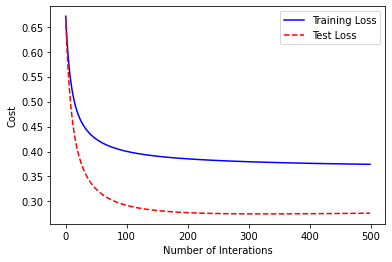

In [49]:
loss_history_test = np.zeros(iterations)
for i in range(iterations):
    loss_history_test[i] = loss_function(X_test, y_test, weight_history[i], bias_history[i]) 
index = np.arange(0, iterations, 1)
plt.plot(index, loss_history, c='b', linestyle='solid')
plt.plot(index, loss_history_test, c='r', linestyle='--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Number of Interations')
plt.ylabel('Cost')
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print('SK 预测准确率：{:.2f}%'.format(lr_model.score(X_test, y_test) * 100))

SK 预测准确率：88.52%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
a = pd.get_dummies(df_heart['cp'], prefix='cp')
b = pd.get_dummies(df_heart['thal'], prefix='thal')
c = pd.get_dummies(df_heart['slope'], prefix='slope')

frames = [df_heart, a, b, c]
df_heart = pd.concat(frames, axis=1)
df_heart = df_heart.drop(columns=['cp', 'thal', 'slope'])
df_heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
